Exercise - Analyzing Data Science Job Demand

In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [2]:
df_id = df[df['job_country'] == 'Indonesia'].copy()

In [3]:
df_id['job_posted_month'] = df_id['job_posted_date'].dt.strftime('%B')



In [4]:
df_id_pivot = df_id.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')

In [5]:
df_id_pivot.reset_index(inplace=True)
df_id_pivot['month_no'] = pd.to_datetime(df_id_pivot['job_posted_month'], format='%B').dt.month

df_id_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [6]:
df_id_pivot.sort_values('month_no', inplace = True)
df_id_pivot.set_index('job_posted_month', inplace = True)
df_id_pivot.drop(columns='month_no', inplace=True)

In [7]:
df_id_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,14,9,35,117,80,8,5,10,19,14
February,9,2,25,78,44,5,4,12,5,18
March,6,5,21,90,36,2,1,13,5,14
April,5,3,20,46,28,2,1,9,8,14
May,11,9,25,79,39,3,2,8,9,4
June,11,4,22,66,32,4,1,8,9,8
July,11,3,25,58,46,9,4,8,3,20
August,12,5,32,78,46,1,3,5,5,15
September,4,7,34,83,50,6,5,10,8,9


<Axes: xlabel='job_posted_month'>

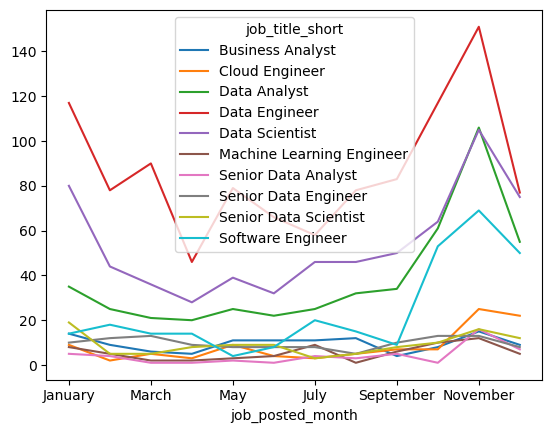

In [8]:
df_id_pivot.plot(kind='line')

In [9]:
top_3 = df_id['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

<Axes: xlabel='job_posted_month'>

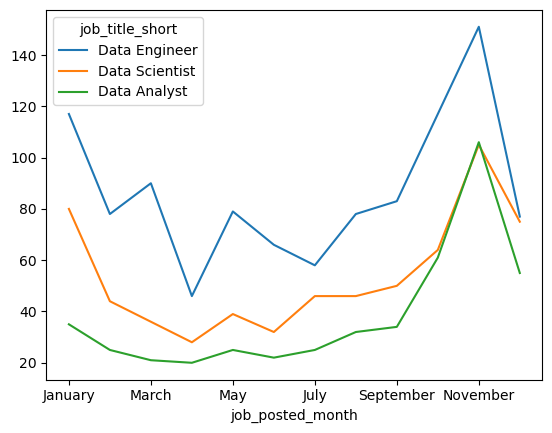

In [10]:
df_id_pivot[top_3].plot(kind='line')